In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pickle
import pandas as pd
from scipy import stats

import session

/home/colleen/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
# set the main data directory (this needs to be changed by each user)
maindir = '/media/colleen/LaCie/CredAssign/pilot_data'

In [40]:
# get all the sessions to analyze
mouse_df = pd.read_pickle('mouse_df.pkl')

omit_sess = [721038464] # alignment didn't work

n_mice = 4

# include criterion of passing QC?
include_qc = True
if include_qc:
    allsessions = mouse_df.loc[(mouse_df['all_files'] == 1) & 
                               (mouse_df['sessionid'].isin(omit_sess) == False) &
                               (mouse_df['pass_fail'] == 'P')]['sessionid'].tolist()
else:
    allsessions = mouse_df.loc[(mouse_df['all_files'] == 1) & 
                               (mouse_df['sessionid'].isin(omit_sess) == False)]['sessionid'].tolist()

high = [20, 75]
low = [175, 375]

In [14]:
# create a dictionary with Session objects prepared for analysis
sdict = {}
gabordict = {}
for sess in allsessions:                       # remove the :1 to get all sessions ready
    print("\nCreating session {}...".format(sess))
    sdict[sess] = session.Session(maindir,sess)    # creates a session object to work with
    sdict[sess].extract_info()  
    gabordict[sess] = session.Stim(sdict[sess],1,'gabors')
    print("finished session {}.".format(sess))


Creating session 712483302...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_712483302
Loading running data...
Loading ROI trace info...


finished session 712483302.

Creating session 712942208...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_712942208
Loading running data...
Loading ROI trace info...


finished session 712942208.

Creating session 715244457...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_715244457
Loading running data...
Loading ROI trace info...


finished session 715244457.

Creating session 716425232...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle alrea

Loading ROI trace info...




finished session 723322122.

Creating session 723323411...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_723323411
Loading running data...
Loading ROI trace info...




finished session 723323411.

Creating session 724421207...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_724421207
Loading running data...
Loading ROI trace info...




finished session 724421207.

Creating session 724422062...
Loading stimulus dictionary...
Loading alignment dataframe...
NOTE: Stimulus alignment pickle already exists in /media/colleen/LaCie/CredAssign/pilot_data/ophys_session_724422062
Loading running data...
Loading ROI trace info...




finished session 724422062.

Creating session 725009252...
Loading stimulus dictionary...
Load

In [32]:
#M1 L1 Kappa 4
snums = mouse_df.loc[(mouse_df['sessionid'].isin(allsessions)) &
                     (mouse_df['mouseid'] == 1) &
                     (mouse_df['depth'].isin(high))]['sessionid'].tolist()

numtotake = 30
pad=(45,20)
sts = []
nts = []
for S in snums:
    print(S)
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=4,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
flat_sts  = np.array([item for sublist in sts for item in sublist])
flat_nts = np.array([item for sublist in nts for item in sublist])
M1L1_pvals_surp_k4 = stats.ttest_rel(flat_sts,flat_nts,axis=1)[1]
M1L1_diffs_surp_k4 = np.mean(flat_sts-flat_nts,axis=1)

720520553
722126561
723323411


In [33]:
#M1 L23 Kappa 4
snums = mouse_df.loc[(mouse_df['sessionid'].isin(allsessions)) &
                     (mouse_df['mouseid'] == 1) &
                     (mouse_df['depth'].isin(low))]['sessionid'].tolist()

numtotake = 30
pad=(45,20)
sts = []
nts = []
for S in snums:
    print(S)
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=4,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
flat_sts  = np.array([item for sublist in sts for item in sublist])
flat_nts = np.array([item for sublist in nts for item in sublist])
M1L23_pvals_surp_k4 = stats.ttest_rel(flat_sts,flat_nts,axis=1)[1]
M1L23_diffs_surp_k4 = np.mean(flat_sts-flat_nts,axis=1)

720519615
721032982
721975393
723322122


In [34]:
#M3 L1 Kappa 16
snums = mouse_df.loc[(mouse_df['sessionid'].isin(allsessions)) &
                     (mouse_df['mouseid'] == 3) &
                     (mouse_df['depth'].isin(high))]['sessionid'].tolist()

numtotake = 30
pad=(45,20)
sts = []
nts = []
for S in snums:
    print(S)
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=16,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
flat_sts  = np.array([item for sublist in sts for item in sublist])
flat_nts = np.array([item for sublist in nts for item in sublist])
M3L1_pvals_surp_k16 = stats.ttest_rel(flat_sts,flat_nts,axis=1)[1]
M3L1_diffs_surp_k16 = np.mean(flat_sts-flat_nts,axis=1)

724422062
725010342
726844248
727683236


In [35]:
#M3 L23 Kappa 16
snums = mouse_df.loc[(mouse_df['sessionid'].isin(allsessions)) &
                     (mouse_df['mouseid'] == 3) &
                     (mouse_df['depth'].isin(low))]['sessionid'].tolist()

numtotake = 30
pad=(45,20)
sts = []
nts = []
for S in snums:
    print(S)
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=16,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
flat_sts  = np.array([item for sublist in sts for item in sublist])
flat_nts = np.array([item for sublist in nts for item in sublist])
M3L23_pvals_surp_k16 = stats.ttest_rel(flat_sts,flat_nts,axis=1)[1]
M3L23_diffs_surp_k16 = np.mean(flat_sts-flat_nts,axis=1)

724421207
725009252
726837871
727680211


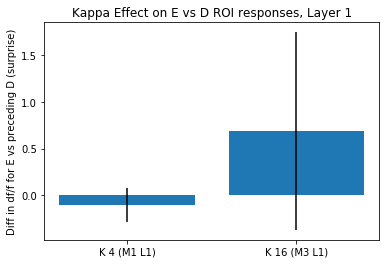

In [36]:
means = [np.mean(M1L1_diffs_surp_k4),np.mean(M3L1_diffs_surp_k16)]
stds = [np.std(M1L1_diffs_surp_k4)/np.sqrt(len(M1L1_diffs_surp_k4)),np.std(M3L1_diffs_surp_k16)/np.sqrt(len(M3L1_diffs_surp_k16))]
plt.bar([1,2],means,yerr=stds)
plt.xticks([1,2],['K 4 (M1 L1)','K 16 (M3 L1)'])
plt.ylabel('Diff in df/f for E vs preceding D (surprise)')
plt.title('Kappa Effect on E vs D ROI responses, Layer 1')
plt.savefig('Layer1_Mouse1and3_EvsD_GaborResponses_KappaBarPlot_Delta.png')

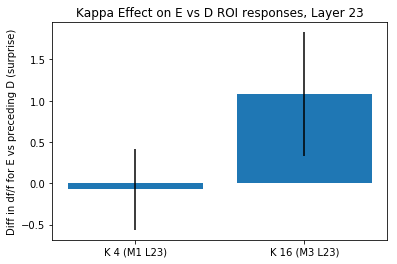

In [37]:
means = [np.mean(M1L23_diffs_surp_k4),np.mean(M3L23_diffs_surp_k16)]
stds = [np.std(M1L23_diffs_surp_k4)/np.sqrt(len(M1L23_diffs_surp_k4)),np.std(M3L23_diffs_surp_k16)/np.sqrt(len(M3L23_diffs_surp_k16))]
plt.bar([1,2],means,yerr=stds)
plt.xticks([1,2],['K 4 (M1 L23)','K 16 (M3 L23)'])
plt.ylabel('Diff in df/f for E vs preceding D (surprise)')
plt.title('Kappa Effect on E vs D ROI responses, Layer 23')
plt.savefig('Layer23_Mouse1and3_EvsD_GaborResponses_KappaBarPlot_Delta.png')

In [38]:
#M2 L1 
snums = mouse_df.loc[(mouse_df['sessionid'].isin(allsessions)) &
                     (mouse_df['mouseid'] == 2) &
                     (mouse_df['depth'].isin(high))]['sessionid'].tolist()

numtotake = 30
pad=(45,20)
sts4 = []
nts4 = []

sts16 = []
nts16 = []

for S in snums:
    print(S)
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=4,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts4.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts4.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=16,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts16.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts16.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
flat_sts4  = np.array([item for sublist in sts4 for item in sublist])
flat_nts4 = np.array([item for sublist in nts4 for item in sublist])
M2L1_pvals_surp_k4 = stats.ttest_rel(flat_sts4,flat_nts4,axis=1)[1]
M2L1_diffs_surp_k4 = np.mean(flat_sts4-flat_nts4,axis=1)

flat_sts16  = np.array([item for sublist in sts16 for item in sublist])
flat_nts16 = np.array([item for sublist in nts16 for item in sublist])
M2L1_pvals_surp_k16 = stats.ttest_rel(flat_sts16,flat_nts16,axis=1)[1]
M2L1_diffs_surp_k16 = np.mean(flat_sts16-flat_nts16,axis=1)

715244457
716711420


In [42]:
#M4 L1
snums = mouse_df.loc[(mouse_df['sessionid'].isin(allsessions)) &
                     (mouse_df['mouseid'] == 4) &
                     (mouse_df['depth'].isin(high))]['sessionid'].tolist()

numtotake = 30
pad=(45,20)
sts4 = []
nts4 = []

sts16 = []
nts16 = []

for S in snums:
    print(S)
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=4,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts4.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts4.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=16,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts16.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts16.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
flat_sts4  = np.array([item for sublist in sts4 for item in sublist])
flat_nts4 = np.array([item for sublist in nts4 for item in sublist])
M4L1_pvals_surp_k4 = stats.ttest_rel(flat_sts4,flat_nts4,axis=1)[1]
M4L1_diffs_surp_k4 = np.mean(flat_sts4-flat_nts4,axis=1)

flat_sts16  = np.array([item for sublist in sts16 for item in sublist])
flat_nts16 = np.array([item for sublist in nts16 for item in sublist])
M4L1_pvals_surp_k16 = stats.ttest_rel(flat_sts16,flat_nts16,axis=1)[1]
M4L1_diffs_surp_k16 = np.mean(flat_sts16-flat_nts16,axis=1)

718742560
722188453


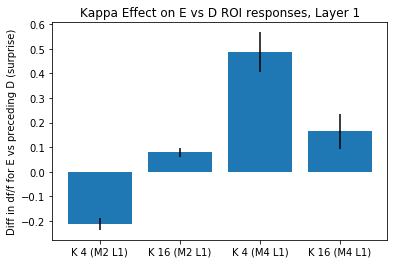

In [43]:
means = [np.mean(M2L1_diffs_surp_k4),np.mean(M2L1_diffs_surp_k16),np.mean(M4L1_diffs_surp_k4),np.mean(M4L1_diffs_surp_k16)]
stds = [np.std(M2L1_diffs_surp_k4)/np.sqrt(len(M2L1_diffs_surp_k4)),np.std(M2L1_diffs_surp_k16)/np.sqrt(len(M2L1_diffs_surp_k16)),np.std(M4L1_diffs_surp_k4)/np.sqrt(len(M4L1_diffs_surp_k4)),np.std(M4L1_diffs_surp_k16)/np.sqrt(len(M4L1_diffs_surp_k16))]
plt.bar([1,2,3,4],means,yerr=stds)
plt.xticks([1,2,3,4],['K 4 (M2 L1)','K 16 (M2 L1)','K 4 (M4 L1)','K 16 (M4 L1)' ])
plt.ylabel('Diff in df/f for E vs preceding D (surprise)')
plt.title('Kappa Effect on E vs D ROI responses, Layer 1')
plt.savefig('Layer1_Mouse2and4_EvsD_GaborResponses_KappaBarPlot_Delta.png')

In [44]:
#M2 L5 
snums = mouse_df.loc[(mouse_df['sessionid'].isin(allsessions)) &
                     (mouse_df['mouseid'] == 2) &
                     (mouse_df['depth'].isin(low))]['sessionid'].tolist()

numtotake = 30
pad=(45,20)
sts4 = []
nts4 = []

sts16 = []
nts16 = []

for S in snums:
    print(S)
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=4,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts4.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts4.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=16,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts16.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts16.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
flat_sts4  = np.array([item for sublist in sts4 for item in sublist])
flat_nts4 = np.array([item for sublist in nts4 for item in sublist])
M2L5_pvals_surp_k4 = stats.ttest_rel(flat_sts4,flat_nts4,axis=1)[1]
M2L5_diffs_surp_k4 = np.mean(flat_sts4-flat_nts4,axis=1)

flat_sts16  = np.array([item for sublist in sts16 for item in sublist])
flat_nts16 = np.array([item for sublist in nts16 for item in sublist])
M2L5_pvals_surp_k16 = stats.ttest_rel(flat_sts16,flat_nts16,axis=1)[1]
M2L5_diffs_surp_k16 = np.mean(flat_sts16-flat_nts16,axis=1)

716425232
717030161


In [45]:
#M4 L5 
snums = mouse_df.loc[(mouse_df['sessionid'].isin(allsessions)) &
                     (mouse_df['mouseid'] == 4) &
                     (mouse_df['depth'].isin(low))]['sessionid'].tolist()

numtotake = 30
pad=(45,20)
sts4 = []
nts4 = []

sts16 = []
nts16 = []

for S in snums:
    print(S)
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=4,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts4.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts4.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
    ssegs= sdict[S].gabors.get_segs_by_criteria(gaborframe=3,surp=1,stimPar2=16,remconsec=True)
    sframes = gabordict[S].get_2pframes_by_seg(ssegs[0])
    straces = sdict[S].get_roi_segments(sframes,padding=pad)
    nts16.append(np.nanmean(straces[:,0:9,0:numtotake],axis=1)) #mean response over preceding "D"
    sts16.append(np.nanmean(straces[:,pad[0]:pad[0]+9,0:numtotake],axis=1))#mean response over "E"
    
flat_sts4  = np.array([item for sublist in sts4 for item in sublist])
flat_nts4 = np.array([item for sublist in nts4 for item in sublist])
M4L5_pvals_surp_k4 = stats.ttest_rel(flat_sts4,flat_nts4,axis=1)[1]
M4L5_diffs_surp_k4 = np.mean(flat_sts4-flat_nts4,axis=1)

flat_sts16  = np.array([item for sublist in sts16 for item in sublist])
flat_nts16 = np.array([item for sublist in nts16 for item in sublist])
M4L5_pvals_surp_k16 = stats.ttest_rel(flat_sts16,flat_nts16,axis=1)[1]
M4L5_diffs_surp_k16 = np.mean(flat_sts16-flat_nts16,axis=1)

718579351
719034388


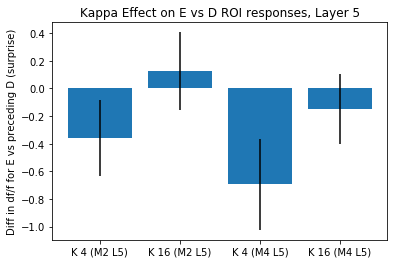

In [46]:
means = [np.mean(M2L5_diffs_surp_k4),np.mean(M2L5_diffs_surp_k16),np.mean(M4L5_diffs_surp_k4),np.mean(M4L5_diffs_surp_k16)]
stds = [np.std(M2L5_diffs_surp_k4)/np.sqrt(len(M2L5_diffs_surp_k4)),np.std(M2L5_diffs_surp_k16)/np.sqrt(len(M2L5_diffs_surp_k16)),np.std(M4L5_diffs_surp_k4)/np.sqrt(len(M4L5_diffs_surp_k4)),np.std(M4L5_diffs_surp_k16)/np.sqrt(len(M4L5_diffs_surp_k16))]
plt.bar([1,2,3,4],means,yerr=stds)
plt.xticks([1,2,3,4],['K 4 (M2 L5)','K 16 (M2 L5)','K 4 (M4 L5)','K 16 (M4 L5)' ])
plt.ylabel('Diff in df/f for E vs preceding D (surprise)')
plt.title('Kappa Effect on E vs D ROI responses, Layer 5')
plt.savefig('Layer5_Mouse2and4_EvsD_GaborResponses_KappaBarPlot_Delta.png')